<a href="https://colab.research.google.com/github/safranco8/entregables-grupo-31/blob/main/AEyC/Nueva%20entrega/AEyC_Entregable_Parte_1_25_08_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# **Grupo 31**
## Integrantes:

Victor Nicolas Rocco

Maria Mercedes Silva

Santiago Franco

Williams Gremoliche

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
#010 Instalamos e Importamos las librerías necesarias.
!pip install python-decouple
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import seaborn as sns
sns.set_context('talk')
import plotly
plotly.__version__
# Make sure it's 4.14.3

from decouple import config
from sqlalchemy import create_engine, text


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



# Respuesta del ejercicio 1 punto 1
Crear una base de datos en SQLite utilizando la libreria SQLalchemy. https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

In [ ]:
#020 Creamos una base de datos en SQLite utilizando la libreria SQLalchemy.  Melbourne, Australia
from sqlalchemy import create_engine, text
engine = create_engine('sqlite:///sysarmy.sqlite3', echo=True)

# Respuesta del ejercicio 1 punto 2
Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

**En el punto #020 se crea la base de datos SQL, luego se genrera la tabla Melbourne a partir del dataframe melb_df** 

In [ ]:
#030 Ingresamos dataset de ventas de propiedades en Melbourne, Australia.
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,"1,480,000.00",S,Biggin,3/12/2016,2.50,"3,067.00",...,1.00,1.00,202.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
1,Abbotsford,25 Bloomburg St,2,h,"1,035,000.00",S,Biggin,4/02/2016,2.50,"3,067.00",...,1.00,0.00,156.00,79.00,"1,900.00",Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
2,Abbotsford,5 Charles St,3,h,"1,465,000.00",SP,Biggin,4/03/2017,2.50,"3,067.00",...,2.00,0.00,134.00,150.00,"1,900.00",Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"


In [ ]:
#040 Convertimos nuestro dataframe en una table de SQL
melb_df.to_sql('Melbourne', con=engine, if_exists="replace")

2022-08-24 00:18:06,097 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Melbourne")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("Melbourne")


2022-08-24 00:18:06,104 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:06,114 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Melbourne")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("Melbourne")


2022-08-24 00:18:06,119 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:06,128 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


2022-08-24 00:18:06,133 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:06,140 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Melbourne")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("Melbourne")


2022-08-24 00:18:06,145 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:06,164 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2022-08-24 00:18:06,172 INFO sqlalchemy.engine.Engine [raw sql] ('Melbourne',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('Melbourne',)


2022-08-24 00:18:06,175 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("Melbourne")


INFO:sqlalchemy.engine.Engine:PRAGMA main.foreign_key_list("Melbourne")


2022-08-24 00:18:06,178 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:06,181 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("Melbourne")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.foreign_key_list("Melbourne")


2022-08-24 00:18:06,184 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:06,187 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2022-08-24 00:18:06,189 INFO sqlalchemy.engine.Engine [raw sql] ('Melbourne',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('Melbourne',)


2022-08-24 00:18:06,193 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("Melbourne")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("Melbourne")


2022-08-24 00:18:06,195 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:06,198 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_Melbourne_index")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_info("ix_Melbourne_index")


2022-08-24 00:18:06,201 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:06,204 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("Melbourne")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("Melbourne")


2022-08-24 00:18:06,207 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:06,210 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_Melbourne_index")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_info("ix_Melbourne_index")


2022-08-24 00:18:06,213 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:06,215 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2022-08-24 00:18:06,218 INFO sqlalchemy.engine.Engine [raw sql] ('Melbourne',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('Melbourne',)


2022-08-24 00:18:06,222 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2022-08-24 00:18:06,225 INFO sqlalchemy.engine.Engine 
DROP TABLE "Melbourne"


INFO:sqlalchemy.engine.Engine:
DROP TABLE "Melbourne"


2022-08-24 00:18:06,227 INFO sqlalchemy.engine.Engine [no key 0.00262s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00262s] ()


2022-08-24 00:18:06,288 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2022-08-24 00:18:06,301 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2022-08-24 00:18:06,314 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Melbourne" (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE "Melbourne" (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




2022-08-24 00:18:06,320 INFO sqlalchemy.engine.Engine [no key 0.00648s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00648s] ()


2022-08-24 00:18:06,337 INFO sqlalchemy.engine.Engine CREATE INDEX "ix_Melbourne_index" ON "Melbourne" ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX "ix_Melbourne_index" ON "Melbourne" ("index")


2022-08-24 00:18:06,340 INFO sqlalchemy.engine.Engine [no key 0.00357s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00357s] ()


2022-08-24 00:18:06,359 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2022-08-24 00:18:06,438 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2022-08-24 00:18:07,098 INFO sqlalchemy.engine.Engine INSERT INTO "Melbourne" ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO "Melbourne" ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2022-08-24 00:18:07,105 INFO sqlalchemy.engine.Engine [generated in 0.60475s] ((0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8

INFO:sqlalchemy.engine.Engine:[generated in 0.60475s] ((0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8072, 144.9941, 'Northern

2022-08-24 00:18:07,255 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2022-08-24 00:18:07,291 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


2022-08-24 00:18:07,304 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


In [ ]:
#050 Ingresamos el dataset de airbnb tratado en clases
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (35,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#060 Convertimos el dataframe airbnb en una base de datos en SQL
airbnb_df.to_sql('Airbnb', con=engine, if_exists="replace")

2022-08-24 00:18:17,825 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("Airbnb")


2022-08-24 00:18:17,831 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:17,838 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("Airbnb")


2022-08-24 00:18:17,846 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:17,852 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


2022-08-24 00:18:17,870 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:17,877 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("Airbnb")


2022-08-24 00:18:17,894 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:17,955 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2022-08-24 00:18:17,970 INFO sqlalchemy.engine.Engine [raw sql] ('Airbnb',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('Airbnb',)


2022-08-24 00:18:17,975 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("Airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.foreign_key_list("Airbnb")


2022-08-24 00:18:17,985 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:17,996 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("Airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.foreign_key_list("Airbnb")


2022-08-24 00:18:18,011 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:18,023 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2022-08-24 00:18:18,038 INFO sqlalchemy.engine.Engine [raw sql] ('Airbnb',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('Airbnb',)


2022-08-24 00:18:18,055 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("Airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("Airbnb")


2022-08-24 00:18:18,077 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:18,083 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_Airbnb_index")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_info("ix_Airbnb_index")


2022-08-24 00:18:18,090 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:18,097 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("Airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("Airbnb")


2022-08-24 00:18:18,102 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:18,108 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_Airbnb_index")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_info("ix_Airbnb_index")


2022-08-24 00:18:18,113 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:18,121 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2022-08-24 00:18:18,123 INFO sqlalchemy.engine.Engine [raw sql] ('Airbnb',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('Airbnb',)


2022-08-24 00:18:18,141 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2022-08-24 00:18:18,149 INFO sqlalchemy.engine.Engine 
DROP TABLE "Airbnb"


INFO:sqlalchemy.engine.Engine:
DROP TABLE "Airbnb"


2022-08-24 00:18:18,157 INFO sqlalchemy.engine.Engine [no key 0.00749s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00749s] ()


2022-08-24 00:18:20,931 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2022-08-24 00:18:21,011 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2022-08-24 00:18:21,035 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Airbnb" (
	"index" BIGINT, 
	id BIGINT, 
	listing_url TEXT, 
	scrape_id FLOAT, 
	last_scraped TEXT, 
	name TEXT, 
	summary TEXT, 
	space TEXT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	notes TEXT, 
	transit TEXT, 
	access TEXT, 
	interaction TEXT, 
	house_rules TEXT, 
	picture_url TEXT, 
	host_id BIGINT, 
	host_url TEXT, 
	host_name TEXT, 
	host_since TEXT, 
	host_location TEXT, 
	host_about TEXT, 
	host_response_time TEXT, 
	host_response_rate TEXT, 
	host_is_superhost TEXT, 
	host_thumbnail_url TEXT, 
	host_picture_url TEXT, 
	host_neighborhood TEXT, 
	host_verifications TEXT, 
	host_has_profile_pic TEXT, 
	host_identity_verified TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode TEXT, 
	smart_location TEXT, 
	country_code TEXT, 
	country TEXT, 
	latitude FLOAT, 
	longitude FLOAT, 
	is_location_exact TEXT, 
	property_type TEXT, 
	room_type TEXT, 
	accommodates BIG

INFO:sqlalchemy.engine.Engine:
CREATE TABLE "Airbnb" (
	"index" BIGINT, 
	id BIGINT, 
	listing_url TEXT, 
	scrape_id FLOAT, 
	last_scraped TEXT, 
	name TEXT, 
	summary TEXT, 
	space TEXT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	notes TEXT, 
	transit TEXT, 
	access TEXT, 
	interaction TEXT, 
	house_rules TEXT, 
	picture_url TEXT, 
	host_id BIGINT, 
	host_url TEXT, 
	host_name TEXT, 
	host_since TEXT, 
	host_location TEXT, 
	host_about TEXT, 
	host_response_time TEXT, 
	host_response_rate TEXT, 
	host_is_superhost TEXT, 
	host_thumbnail_url TEXT, 
	host_picture_url TEXT, 
	host_neighborhood TEXT, 
	host_verifications TEXT, 
	host_has_profile_pic TEXT, 
	host_identity_verified TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode TEXT, 
	smart_location TEXT, 
	country_code TEXT, 
	country TEXT, 
	latitude FLOAT, 
	longitude FLOAT, 
	is_location_exact TEXT, 
	property_type TEXT, 
	room_type TEXT, 
	accommodates BIGINT, 
	bathrooms FLOAT, 

2022-08-24 00:18:21,055 INFO sqlalchemy.engine.Engine [no key 0.01925s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.01925s] ()


2022-08-24 00:18:21,079 INFO sqlalchemy.engine.Engine CREATE INDEX "ix_Airbnb_index" ON "Airbnb" ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX "ix_Airbnb_index" ON "Airbnb" ("index")


2022-08-24 00:18:21,083 INFO sqlalchemy.engine.Engine [no key 0.00479s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00479s] ()


2022-08-24 00:18:21,097 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2022-08-24 00:18:21,368 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2022-08-24 00:18:27,904 INFO sqlalchemy.engine.Engine INSERT INTO "Airbnb" ("index", id, listing_url, scrape_id, last_scraped, name, summary, space, description, neighborhood_overview, notes, transit, access, interaction, house_rules, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighborhood, host_verifications, host_has_profile_pic, host_identity_verified, street, neighborhood, city, suburb, state, zipcode, smart_location, country_code, country, latitude, longitude, is_location_exact, property_type, room_type, accommodates, bathrooms, bedrooms, beds, bed_type, amenities, price, weekly_price, monthly_price, security_deposit, cleaning_fee, guests_included, extra_people, minimum_nights, maximum_nights, calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, firs

INFO:sqlalchemy.engine.Engine:INSERT INTO "Airbnb" ("index", id, listing_url, scrape_id, last_scraped, name, summary, space, description, neighborhood_overview, notes, transit, access, interaction, house_rules, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighborhood, host_verifications, host_has_profile_pic, host_identity_verified, street, neighborhood, city, suburb, state, zipcode, smart_location, country_code, country, latitude, longitude, is_location_exact, property_type, room_type, accommodates, bathrooms, bedrooms, beds, bed_type, amenities, price, weekly_price, monthly_price, security_deposit, cleaning_fee, guests_included, extra_people, minimum_nights, maximum_nights, calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, first_review, last_review, r

2022-08-24 00:18:27,913 INFO sqlalchemy.engine.Engine [generated in 6.08359s] ((0, 9835, 'https://www.airbnb.com/rooms/9835', 20181200000000.0, '12/7/2018', 'Beautiful Room & House', None, 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'Very safe! Family oriented. Older age group.', None, 'YES ! The bus (305,309) is exactly two blocks away and is very frequent', "Kitch

INFO:sqlalchemy.engine.Engine:[generated in 6.08359s] ((0, 9835, 'https://www.airbnb.com/rooms/9835', 20181200000000.0, '12/7/2018', 'Beautiful Room & House', None, 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'Very safe! Family oriented. Older age group.', None, 'YES ! The bus (305,309) is exactly two blocks away and is very frequent', "Kitchen, backyard, upstairs l

2022-08-24 00:18:28,852 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2022-08-24 00:18:29,321 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


2022-08-24 00:18:29,326 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


# Respuesta del ejercicio 1 punto 3

Implementar consultas en SQL que respondan con la siguiente información:

*   Cantidad de registros totales por ciudad.
*   Cantidad de registros totales por barrio y ciudad.

In [ ]:
#070 Creamos funciones para ejecutar las queries
def execute_print_sql(list_of_sql_sentences):
    with engine.connect() as con:
        for query in list_of_sql_sentences:
            rs = con.execute(query)
            print(query)
            for row in rs:
                print(row)
            print('\n\n')

def execute_sql(query):
    with engine.connect() as con:
        rs = con.execute(query)
        return rs           

In [ ]:
#080 cantidad de registros totales por codigo postal y por Suburbios en tabla Melbourne.
query1 = "SELECT Postcode, COUNT(1) FROM Melbourne GROUP BY Postcode"
query2 = "SELECT Postcode, Suburb, COUNT(1) FROM Melbourne GROUP BY Postcode, Suburb"
queries = [query1, query2]

In [ ]:
#090 Implementamos las consultas SQL en la base de datos Melbourne
execute_print_sql(queries)

2022-08-24 00:18:29,368 INFO sqlalchemy.engine.Engine SELECT Postcode, COUNT(1) FROM Melbourne GROUP BY Postcode


INFO:sqlalchemy.engine.Engine:SELECT Postcode, COUNT(1) FROM Melbourne GROUP BY Postcode


2022-08-24 00:18:29,374 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


SELECT Postcode, COUNT(1) FROM Melbourne GROUP BY Postcode
(3000.0, 46)
(3002.0, 22)
(3003.0, 31)
(3006.0, 41)
(3008.0, 3)
(3011.0, 194)
(3012.0, 242)
(3013.0, 164)
(3015.0, 188)
(3016.0, 126)
(3018.0, 80)
(3019.0, 46)
(3020.0, 306)
(3021.0, 55)
(3022.0, 3)
(3023.0, 37)
(3024.0, 4)
(3025.0, 56)
(3027.0, 2)
(3028.0, 9)
(3029.0, 53)
(3030.0, 68)
(3031.0, 179)
(3032.0, 236)
(3033.0, 121)
(3034.0, 74)
(3036.0, 9)
(3037.0, 36)
(3038.0, 39)
(3039.0, 149)
(3040.0, 290)
(3041.0, 91)
(3042.0, 171)
(3043.0, 57)
(3044.0, 171)
(3046.0, 284)
(3047.0, 54)
(3048.0, 21)
(3049.0, 15)
(3051.0, 81)
(3052.0, 31)
(3053.0, 51)
(3054.0, 53)
(3055.0, 110)
(3056.0, 222)
(3057.0, 88)
(3058.0, 246)
(3059.0, 17)
(3060.0, 102)
(3061.0, 4)
(3064.0, 62)
(3065.0, 59)
(3066.0, 65)
(3067.0, 56)
(3068.0, 150)
(3070.0, 188)
(3071.0, 139)
(3072.0, 239)
(3073.0, 359)
(3074.0, 29)
(3075.0, 42)
(3076.0, 52)
(3078.0, 77)
(3079.0, 123)
(3081.0, 170)
(3082.0, 43)
(3083.0, 49)
(3084.0, 176)
(3085.0, 24)
(3087.0, 62)
(3088.0, 47)

INFO:sqlalchemy.engine.Engine:SELECT Postcode, Suburb, COUNT(1) FROM Melbourne GROUP BY Postcode, Suburb


2022-08-24 00:18:29,487 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


SELECT Postcode, Suburb, COUNT(1) FROM Melbourne GROUP BY Postcode, Suburb
(3000.0, 'Melbourne', 46)
(3002.0, 'East Melbourne', 22)
(3003.0, 'West Melbourne', 31)
(3006.0, 'Southbank', 41)
(3008.0, 'Docklands', 3)
(3011.0, 'Footscray', 132)
(3011.0, 'Seddon', 62)
(3012.0, 'Brooklyn', 9)
(3012.0, 'Kingsville', 34)
(3012.0, 'Maidstone', 94)
(3012.0, 'West Footscray', 105)
(3013.0, 'Yarraville', 164)
(3015.0, 'Newport', 137)
(3015.0, 'South Kingsville', 22)
(3015.0, 'Spotswood', 29)
(3016.0, 'Williamstown', 107)
(3016.0, 'Williamstown North', 19)
(3018.0, 'Altona', 74)
(3018.0, 'Seaholme', 6)
(3019.0, 'Braybrook', 46)
(3020.0, 'Albion', 41)
(3020.0, 'Sunshine', 111)
(3020.0, 'Sunshine North', 68)
(3020.0, 'Sunshine West', 86)
(3021.0, 'Albanvale', 6)
(3021.0, 'Kealba', 19)
(3021.0, 'Kings Park', 5)
(3021.0, 'St Albans', 25)
(3022.0, 'Ardeer', 3)
(3023.0, 'Burnside', 2)
(3023.0, 'Burnside Heights', 3)
(3023.0, 'Cairnlea', 7)
(3023.0, 'Caroline Springs', 11)
(3023.0, 'Deer Park', 14)
(3024.

In [ ]:
#100 Cantidad de registros totales por barrio y ciudad agrupados por codigo postal en la base de datos Airbnb
query3 = "SELECT city, COUNT(1) FROM Airbnb GROUP BY city"
query4 ="SELECT city, neighborhood, COUNT(1) FROM Airbnb GROUP BY city, neighborhood"
queries = [query3, query4]

In [ ]:
#110 Implementamos las consultas SQL en la base de datos Airbnb
execute_print_sql(queries)

2022-08-24 00:18:29,807 INFO sqlalchemy.engine.Engine SELECT city, COUNT(1) FROM Airbnb GROUP BY city


INFO:sqlalchemy.engine.Engine:SELECT city, COUNT(1) FROM Airbnb GROUP BY city


2022-08-24 00:18:29,810 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


SELECT city, COUNT(1) FROM Airbnb GROUP BY city
('Banyule', 203)
('Bayside', 375)
('Boroondara', 664)
('Brimbank', 108)
('Cardinia', 123)
('Casey', 153)
('Darebin', 698)
('Frankston', 177)
('Glen Eira', 631)
('Greater Dandenong', 147)
('Hobsons Bay', 239)
('Hume', 170)
('Kingston', 309)
('Knox', 175)
('Manningham', 313)
('Maribyrnong', 436)
('Maroondah', 115)
('Melbourne', 7368)
('Melton', 95)
('Monash', 571)
('Moonee Valley', 344)
('Moreland', 967)
('Nillumbik', 88)
('Port Phillip', 2808)
('Stonnington', 1621)
('Whitehorse', 614)
('Whittlesea', 137)
('Wyndham', 426)
('Yarra', 2049)
('Yarra Ranges', 771)



2022-08-24 00:18:29,895 INFO sqlalchemy.engine.Engine SELECT city, neighborhood, COUNT(1) FROM Airbnb GROUP BY city, neighborhood


INFO:sqlalchemy.engine.Engine:SELECT city, neighborhood, COUNT(1) FROM Airbnb GROUP BY city, neighborhood


2022-08-24 00:18:29,902 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


SELECT city, neighborhood, COUNT(1) FROM Airbnb GROUP BY city, neighborhood
('Banyule', None, 174)
('Banyule', 'Alphington', 16)
('Banyule', 'Preston', 8)
('Banyule', 'Thornbury', 5)
('Bayside', None, 170)
('Bayside', 'Bentleigh', 1)
('Bayside', 'Brighton', 203)
('Bayside', 'Elwood', 1)
('Boroondara', None, 30)
('Boroondara', 'Ashburton', 14)
('Boroondara', 'Balwyn', 70)
('Boroondara', 'Balwyn North', 40)
('Boroondara', 'Camberwell', 82)
('Boroondara', 'Canterbury', 24)
('Boroondara', 'Glen Iris', 32)
('Boroondara', 'Hawthorn', 261)
('Boroondara', 'Kew', 109)
('Boroondara', 'Malvern', 2)
('Brimbank', None, 108)
('Cardinia', None, 123)
('Casey', None, 153)
('Darebin', None, 112)
('Darebin', 'Alphington', 22)
('Darebin', 'Coburg', 4)
('Darebin', 'Northcote', 303)
('Darebin', 'Preston', 156)
('Darebin', 'Thornbury', 101)
('Frankston', None, 177)
('Glen Eira', None, 33)
('Glen Eira', 'Balaclava/Ripponlea', 2)
('Glen Eira', 'Bentleigh', 84)
('Glen Eira', 'Brighton', 2)
('Glen Eira', 'Carneg

# Respuesta del ejercicio 1 punto 4
Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL para obtener un resultado similar a lo realizado con Pandas en clase.

En clase primero se buscó agregar información sobre el valor del vecindario de la propiedad. 
* Promedio de `price` por zipcode
* Promedio de `weekly_price` por zipcode
* Promedio de `monthly_price` por zipcode


In [ ]:
#120 Join entre Melb y airbnb
#
Melbourne_join_airbnb ="""
                  WITH airbnb_agg as 
                  (SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(price), 2) as avg_price, 
                          ROUND(AVG(weekly_price), 2) as avg_weekly_price,
                          ROUND(AVG(monthly_price), 2) as avg_monthly_price,
                          COUNT(*) as zipcode_count            
                  FROM Airbnb GROUP BY int_zipcode)

                  SELECT  m.*, 
                          avg_price,
                          avg_monthly_price,
                          avg_weekly_price,
                          zipcode_count
                  FROM Melbourne m 
                  left join airbnb_agg a on m.Postcode == a.int_zipcode"""

execute_print_sql([Melbourne_join_airbnb])

2022-08-24 00:18:30,039 INFO sqlalchemy.engine.Engine 
                  WITH airbnb_agg as 
                  (SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(price), 2) as avg_price, 
                          ROUND(AVG(weekly_price), 2) as avg_weekly_price,
                          ROUND(AVG(monthly_price), 2) as avg_monthly_price,
                          COUNT(*) as zipcode_count            
                  FROM Airbnb GROUP BY int_zipcode)

                  SELECT  m.*, 
                          avg_price,
                          avg_monthly_price,
                          avg_weekly_price,
                          zipcode_count
                  FROM Melbourne m 
                  left join airbnb_agg a on m.Postcode == a.int_zipcode


INFO:sqlalchemy.engine.Engine:
                  WITH airbnb_agg as 
                  (SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(price), 2) as avg_price, 
                          ROUND(AVG(weekly_price), 2) as avg_weekly_price,
                          ROUND(AVG(monthly_price), 2) as avg_monthly_price,
                          COUNT(*) as zipcode_count            
                  FROM Airbnb GROUP BY int_zipcode)

                  SELECT  m.*, 
                          avg_price,
                          avg_monthly_price,
                          avg_weekly_price,
                          zipcode_count
                  FROM Melbourne m 
                  left join airbnb_agg a on m.Postcode == a.int_zipcode


2022-08-24 00:18:30,046 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


Se truncaron las últimas líneas 5000 del resultado de transmisión.
(8583, 'Carlton', '2/100 Keppel St', 2, 't', 960000.0, 'VB', 'Nelson', '20/05/2017', 1.8, 3053.0, 2.0, 2.0, 1.0, 0.0, 90.0, 1860.0, 'Melbourne', -37.7947, 144.9724, 'Northern Metropolitan', 6786.0, 111.77, 3205.32, 923.51, 538)
(8584, 'Carlton', '11/108 Elgin St', 2, 'u', 995000.0, 'S', 'Woodards', '22/04/2017', 1.8, 3053.0, 2.0, 2.0, 1.0, 0.0, 110.0, 2000.0, 'Melbourne', -37.7973, 144.9712, 'Northern Metropolitan', 6786.0, 111.77, 3205.32, 923.51, 538)
(8585, 'Carlton', '20/264 Drummond St', 1, 'u', 490000.0, 'S', 'hockingstuart', '29/04/2017', 1.8, 3053.0, 1.0, 1.0, 1.0, 0.0, 51.0, 2009.0, 'Melbourne', -37.7998, 144.9689, 'Northern Metropolitan', 6786.0, 111.77, 3205.32, 923.51, 538)
(8586, 'Carlton', '10/3 Lytton St', 2, 'u', 500000.0, 'VB', 'Peter', '29/04/2017', 1.8, 3053.0, 2.0, 1.0, 1.0, 4076.0, None, None, 'Melbourne', -37.7941, 144.9678, 'Northern Metropolitan', 6786.0, 111.77, 3205.32, 923.51, 538)
(8587, 'Eag

## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

# Respuesta del ejercicio 2 punto 1

## **Columnas relevantes** 
Las columnas relevantes se eligieron  tomando como umbral para las variables numéricas con una **correlación moderada o superior** en adelante con el precio o con las variables que nos permitan dar con la ubicación o referencia del inmueble, tal como veremos en el código que está a continuación.

##  **Interpretación del coeficiente de correlación**

* Entre 0 y 0,10: correlación inexistente
* Entre 0,10 y 0,29: correlación débil
* Entre 0,30 y 0,50: correlación moderada
* Entre 0,50 y 1,00: correlación fuerte

Selecionamos las variables con **correlación moderada** en adelante y las que nos pudan permitir unir los 2 dataset de Melbourne y Airbnb

### **Melbourne**

* **Suburb, Address, 	Postcode,  CouncilArea, Lattitude, Longtitude, Regionname**, fueron seleciondas porque permiten tener una referencia de la zonas de los inmuebles y sus precios.
* **Type,	Date, Method, SellerG** estas variables categoricas se dejan ya que se analizarán en el Lab 2 su aporte con la variable **Price** 
* **Rooms, BuildingArea, YearBuilt**, tienen una correlación  moderada/fuerte con **Price**

### **Airbnb**

* **street, neighborhood, city, suburb, state, zipcode,  latitude, longitude**, fueron seleciondas porque permiten tener una referencia de la zonas de los inmuebles y sus precios.

* **cleaning_fee, bedrooms, security_deposit, weekly_price, monthly_price**, tienen una correlación  moderada/fuerte con **Price**


## **Columnas descartadas** 
El cambio de  estas variables no tiene vinculo o relación con el precio final del inmueble.

### **Melbourne**

* **Bedroom2, Bathroom, Car, Landsize** tienen una correlación  moderada/fuerte con **Rooms** y no aportan información adicional.

El resto de las variables se descartaron porque tienen una correlación menor a 0.3 que es considerada una baja correlación.

### **Airbnb**

**bathrooms, beds, accommodates** se descartan porque tienen fuerte correlación con **bedrooms** y esta ultima tiene una correlación más fuerte con **Price**.

El resto de las variables se descartaron porque tienen una correlación menor a 0.3 que es considerada una baja correlación.

In [ ]:
#130 Convertimos la tabla en un dataframe
Melbourne_join_airbnb_df = pd.read_sql_query(Melbourne_join_airbnb, engine)
print(Melbourne_join_airbnb_df.columns)

2022-08-24 00:18:38,505 INFO sqlalchemy.engine.Engine 
                  WITH airbnb_agg as 
                  (SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(price), 2) as avg_price, 
                          ROUND(AVG(weekly_price), 2) as avg_weekly_price,
                          ROUND(AVG(monthly_price), 2) as avg_monthly_price,
                          COUNT(*) as zipcode_count            
                  FROM Airbnb GROUP BY int_zipcode)

                  SELECT  m.*, 
                          avg_price,
                          avg_monthly_price,
                          avg_weekly_price,
                          zipcode_count
                  FROM Melbourne m 
                  left join airbnb_agg a on m.Postcode == a.int_zipcode


INFO:sqlalchemy.engine.Engine:
                  WITH airbnb_agg as 
                  (SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(price), 2) as avg_price, 
                          ROUND(AVG(weekly_price), 2) as avg_weekly_price,
                          ROUND(AVG(monthly_price), 2) as avg_monthly_price,
                          COUNT(*) as zipcode_count            
                  FROM Airbnb GROUP BY int_zipcode)

                  SELECT  m.*, 
                          avg_price,
                          avg_monthly_price,
                          avg_weekly_price,
                          zipcode_count
                  FROM Melbourne m 
                  left join airbnb_agg a on m.Postcode == a.int_zipcode


2022-08-24 00:18:38,507 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


Index(['index', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'avg_price',
       'avg_monthly_price', 'avg_weekly_price', 'zipcode_count'],
      dtype='object')


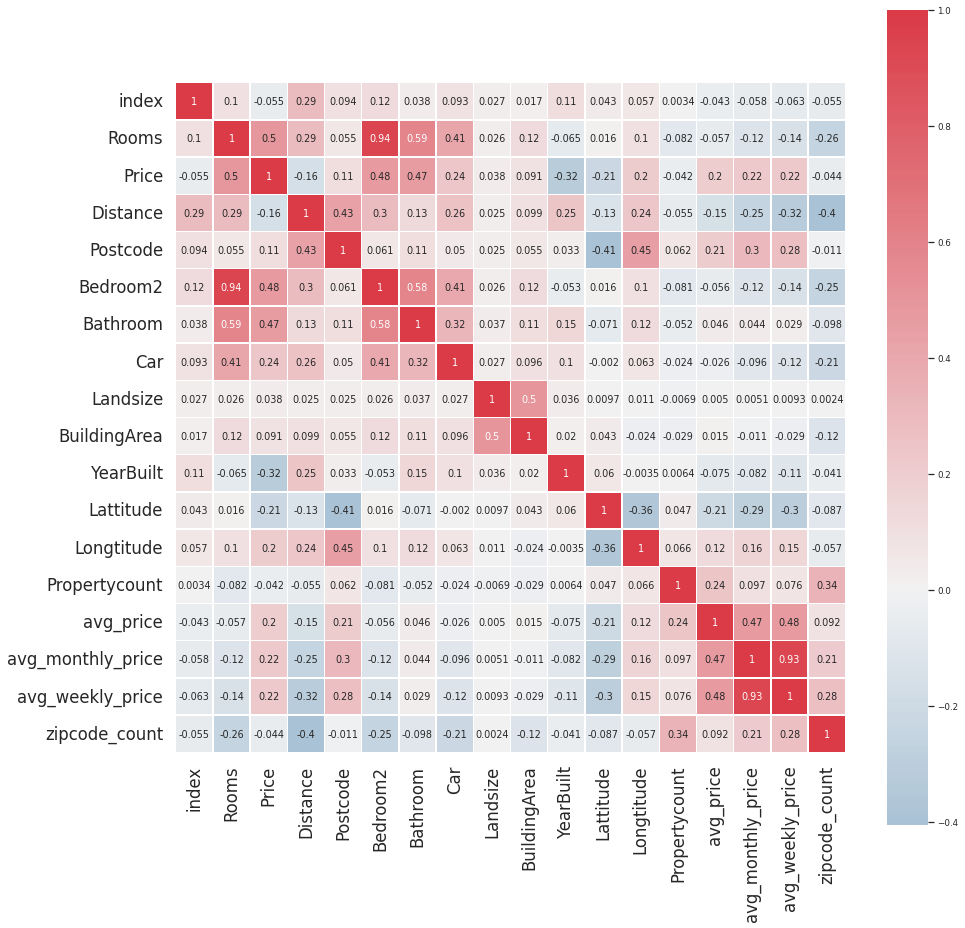

In [ ]:
#0140 Se realiza un heatmap para analizar la correlación entre las variables numéricas con foco en Price.  
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale=0.8)

# Generate a custom diverging colormap

cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(Melbourne_join_airbnb_df.corr(), cmap=cmap, center=0,
             square=True, linewidths=.5, annot=True)

In [ ]:
#150 Seleccionamos las variables numéricas con correlación moderada o superior
interesting_cols_Melb = ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 
]
Melbourne_join_airbnb_df = Melbourne_join_airbnb_df[interesting_cols_Melb]

# **Tratamiento de outliers**
La función para el tratamiento de los outliers se basa en eliminar los valosres que estan fuera de los bigotes del boxplot.

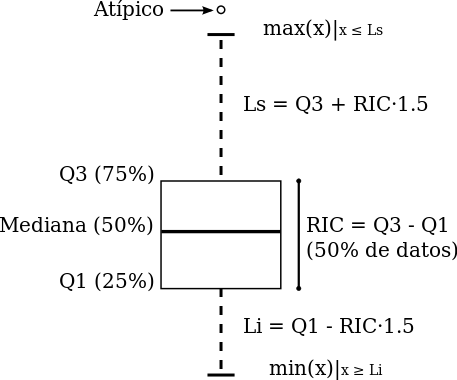

In [ ]:
#160 Función para eliminar outliers
def CustomSampler_IQR (X, features):
      
    df = X.copy()
    indices = [x for x in df.index]    
    out_indexlist = []
    for col in features:
        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(df[col], 25.)
        Q3 = np.nanpercentile(df[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
                
        outliers_index = df[col][(df[col] < lower) | (df[col] > upper)].index.tolist()
        outliers = df[col][(df[col] < lower) | (df[col] > upper)].values        
        out_indexlist.extend(outliers_index)
        
    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    clean_data = np.setdiff1d(indices,out_indexlist)
    return X.loc[clean_data]


In [ ]:
#170 Limpieza de ouliers de Melbourne y Airbnb

cols = ['Rooms', 'Price', 'BuildingArea', 
        'YearBuilt', 'avg_monthly_price', 'avg_weekly_price', 
        'Bathroom', 'Bedroom2', 'zipcode_count','Landsize',	'Distance']

Melbourne_join_airbnb_df = pd.read_sql_query(Melbourne_join_airbnb, engine)
#print(Melbourne_join_airbnb_df.columns)

Melbourne_join_airbnb_df_clear= CustomSampler_IQR(Melbourne_join_airbnb_df, cols)
Melbourne_join_airbnb_df_clear.shape

2022-08-24 00:18:40,791 INFO sqlalchemy.engine.Engine 
                  WITH airbnb_agg as 
                  (SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(price), 2) as avg_price, 
                          ROUND(AVG(weekly_price), 2) as avg_weekly_price,
                          ROUND(AVG(monthly_price), 2) as avg_monthly_price,
                          COUNT(*) as zipcode_count            
                  FROM Airbnb GROUP BY int_zipcode)

                  SELECT  m.*, 
                          avg_price,
                          avg_monthly_price,
                          avg_weekly_price,
                          zipcode_count
                  FROM Melbourne m 
                  left join airbnb_agg a on m.Postcode == a.int_zipcode


INFO:sqlalchemy.engine.Engine:
                  WITH airbnb_agg as 
                  (SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(price), 2) as avg_price, 
                          ROUND(AVG(weekly_price), 2) as avg_weekly_price,
                          ROUND(AVG(monthly_price), 2) as avg_monthly_price,
                          COUNT(*) as zipcode_count            
                  FROM Airbnb GROUP BY int_zipcode)

                  SELECT  m.*, 
                          avg_price,
                          avg_monthly_price,
                          avg_weekly_price,
                          zipcode_count
                  FROM Melbourne m 
                  left join airbnb_agg a on m.Postcode == a.int_zipcode


2022-08-24 00:18:40,797 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


(10009, 26)

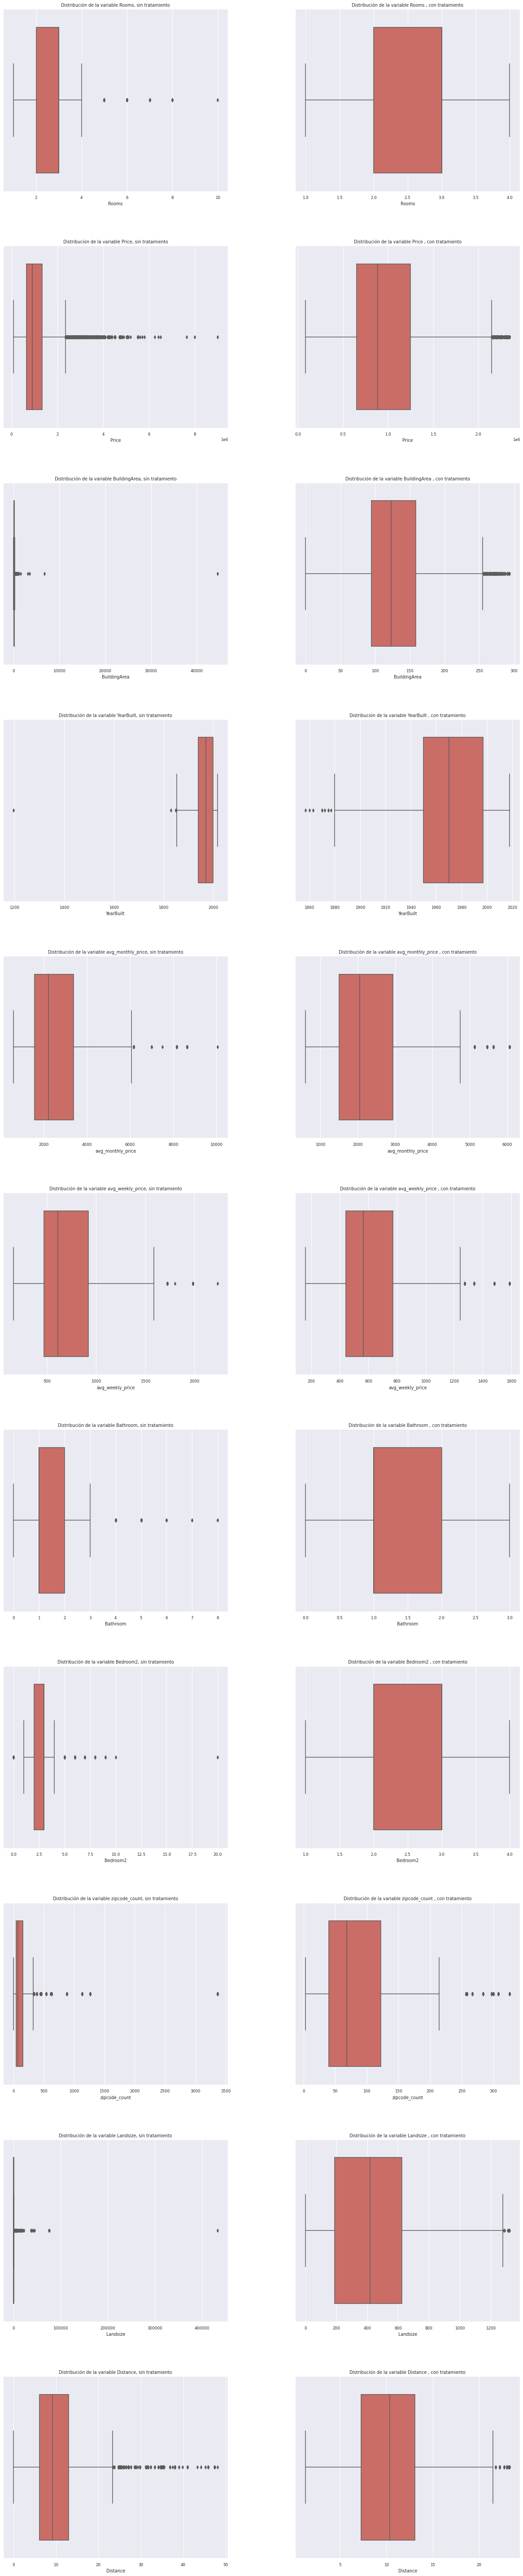

In [ ]:
#180 Graficamos datos con y sin outliers
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(20,10)) #ancho=20, alto=30
for index, col in enumerate(cols):
  axes[index][0].set_title(f"Distribución de la variable {col}, sin tratamiento")
  sns.boxplot(data=Melbourne_join_airbnb_df,  x=Melbourne_join_airbnb_df[col], palette="hls", ax=axes[index][0])

  
  axes[index][1].set_title(f"Distribución de la variable {col} , con tratamiento")
  sns.boxplot(data=Melbourne_join_airbnb_df_clear,  x=Melbourne_join_airbnb_df_clear[col], palette="hls", ax=axes[index][1])
 
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=8, 
                    wspace=0.3, 
                    hspace=0.3)
plt.show()

# Respuesta del ejercicio 2 Punto 2:
Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna price, o aplicar múltiples transformaciones como la mediana o el mínimo.

2.A. Agregar información adicional respectiva al entorno de una propiedad a partir del conjunto de datos de AirBnB utilizado en el práctico.

2.B. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.



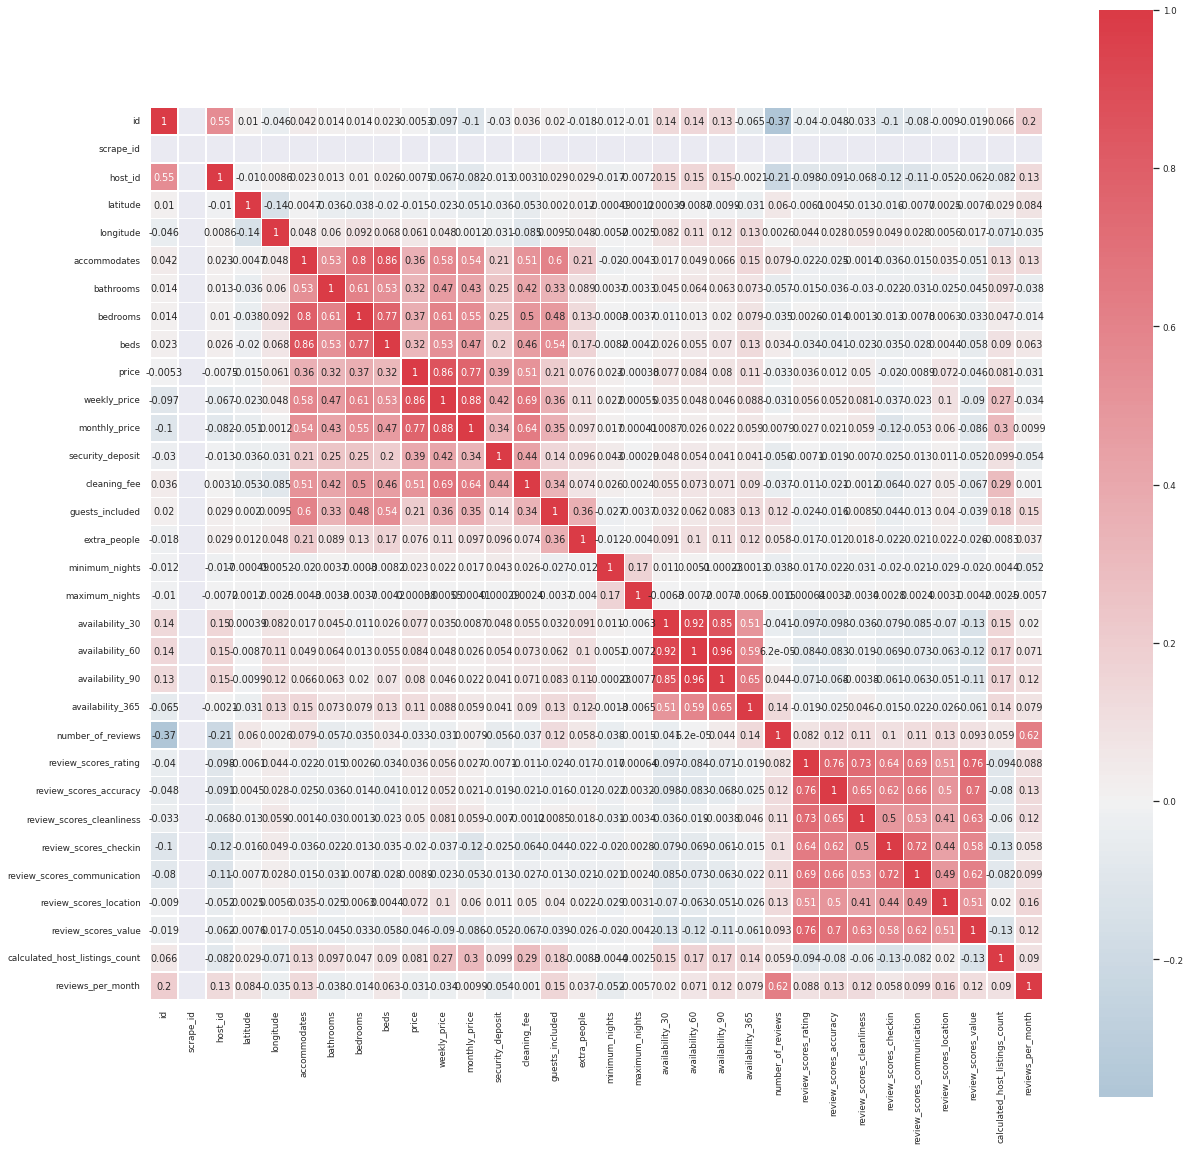

In [ ]:
#190 Se realiza un heatmap para analizar la correlación entre las variables numéricas con foco en Price.  
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale=0.8)

# Generate a custom diverging colormap

cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(airbnb_df.corr(), cmap=cmap, center=0,
             square=True, linewidths=.5, annot=True)

In [ ]:
#200 pasamos el df a tabla
Melbourne_join_airbnb_df_clear.to_sql('Melbourne_join_airbnb_df_clear', con=engine, if_exists="replace")

2022-08-24 00:18:51,893 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Melbourne_join_airbnb_df_clear")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("Melbourne_join_airbnb_df_clear")


2022-08-24 00:18:51,900 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:51,912 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Melbourne_join_airbnb_df_clear")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("Melbourne_join_airbnb_df_clear")


2022-08-24 00:18:51,918 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:51,925 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


2022-08-24 00:18:51,928 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:51,935 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Melbourne_join_airbnb_df_clear")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("Melbourne_join_airbnb_df_clear")


2022-08-24 00:18:51,937 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:51,952 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2022-08-24 00:18:51,957 INFO sqlalchemy.engine.Engine [raw sql] ('Melbourne_join_airbnb_df_clear',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('Melbourne_join_airbnb_df_clear',)


2022-08-24 00:18:51,965 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("Melbourne_join_airbnb_df_clear")


INFO:sqlalchemy.engine.Engine:PRAGMA main.foreign_key_list("Melbourne_join_airbnb_df_clear")


2022-08-24 00:18:51,967 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:51,970 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("Melbourne_join_airbnb_df_clear")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.foreign_key_list("Melbourne_join_airbnb_df_clear")


2022-08-24 00:18:51,973 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:51,976 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2022-08-24 00:18:51,979 INFO sqlalchemy.engine.Engine [raw sql] ('Melbourne_join_airbnb_df_clear',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('Melbourne_join_airbnb_df_clear',)


2022-08-24 00:18:51,982 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("Melbourne_join_airbnb_df_clear")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("Melbourne_join_airbnb_df_clear")


2022-08-24 00:18:51,987 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:51,990 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_Melbourne_join_airbnb_df_clear_level_0")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_info("ix_Melbourne_join_airbnb_df_clear_level_0")


2022-08-24 00:18:51,997 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:52,000 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("Melbourne_join_airbnb_df_clear")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("Melbourne_join_airbnb_df_clear")


2022-08-24 00:18:52,002 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:52,007 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_Melbourne_join_airbnb_df_clear_level_0")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_info("ix_Melbourne_join_airbnb_df_clear_level_0")


2022-08-24 00:18:52,010 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-24 00:18:52,013 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2022-08-24 00:18:52,016 INFO sqlalchemy.engine.Engine [raw sql] ('Melbourne_join_airbnb_df_clear',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('Melbourne_join_airbnb_df_clear',)


2022-08-24 00:18:52,021 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2022-08-24 00:18:52,024 INFO sqlalchemy.engine.Engine 
DROP TABLE "Melbourne_join_airbnb_df_clear"


INFO:sqlalchemy.engine.Engine:
DROP TABLE "Melbourne_join_airbnb_df_clear"


2022-08-24 00:18:52,027 INFO sqlalchemy.engine.Engine [no key 0.00296s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00296s] ()


2022-08-24 00:18:52,052 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2022-08-24 00:18:52,081 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2022-08-24 00:18:52,085 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Melbourne_join_airbnb_df_clear" (
	level_0 BIGINT, 
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT, 
	avg_price FLOAT, 
	avg_monthly_price FLOAT, 
	avg_weekly_price FLOAT, 
	zipcode_count FLOAT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE "Melbourne_join_airbnb_df_clear" (
	level_0 BIGINT, 
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT, 
	avg_price FLOAT, 
	avg_monthly_price FLOAT, 
	avg_weekly_price FLOAT, 
	zipcode_count FLOAT
)




2022-08-24 00:18:52,088 INFO sqlalchemy.engine.Engine [no key 0.00277s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00277s] ()


2022-08-24 00:18:52,101 INFO sqlalchemy.engine.Engine CREATE INDEX "ix_Melbourne_join_airbnb_df_clear_level_0" ON "Melbourne_join_airbnb_df_clear" (level_0)


INFO:sqlalchemy.engine.Engine:CREATE INDEX "ix_Melbourne_join_airbnb_df_clear_level_0" ON "Melbourne_join_airbnb_df_clear" (level_0)


2022-08-24 00:18:52,104 INFO sqlalchemy.engine.Engine [no key 0.00324s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00324s] ()


2022-08-24 00:18:52,117 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2022-08-24 00:18:52,200 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2022-08-24 00:18:52,666 INFO sqlalchemy.engine.Engine INSERT INTO "Melbourne_join_airbnb_df_clear" (level_0, "index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount", avg_price, avg_monthly_price, avg_weekly_price, zipcode_count) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO "Melbourne_join_airbnb_df_clear" (level_0, "index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount", avg_price, avg_monthly_price, avg_weekly_price, zipcode_count) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2022-08-24 00:18:52,674 INFO sqlalchemy.engine.Engine [generated in 0.40531s] ((0, 0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0, 130.62, 2187.03, 605.15, 258.0), (1, 1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0, 130.62, 2187.03, 605.15, 258.0), (2, 2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0, 130.62, 2187.03, 605.15, 258.0), (3, 3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0, 130.62, 2187.03, 605.15, 258.0), (4, 4

INFO:sqlalchemy.engine.Engine:[generated in 0.40531s] ((0, 0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0, 130.62, 2187.03, 605.15, 258.0), (1, 1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0, 130.62, 2187.03, 605.15, 258.0), (2, 2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0, 130.62, 2187.03, 605.15, 258.0), (3, 3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0, 130.62, 2187.03, 605.15, 258.0), (4, 4, 'Abbotsford', '55a Par

2022-08-24 00:18:52,766 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2022-08-24 00:18:52,799 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


2022-08-24 00:18:52,806 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


In [ ]:
#201 Análizamos los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
zipcode_count ="""
select cast(zipcode as int) as zipcode, count(zipcode) as count 
  from Airbnb 
  group by zipcode
"""
  
zipcode_count_df = pd.read_sql_query(zipcode_count, engine).dropna()
print(zipcode_count_df["count"].describe())

2022-08-24 00:18:52,831 INFO sqlalchemy.engine.Engine 
select cast(zipcode as int) as zipcode, count(zipcode) as count 
  from Airbnb 
  group by zipcode



INFO:sqlalchemy.engine.Engine:
select cast(zipcode as int) as zipcode, count(zipcode) as count 
  from Airbnb 
  group by zipcode



2022-08-24 00:18:52,836 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


count     463.00
mean       49.14
std       147.48
min         1.00
25%         5.00
50%        15.00
75%        40.00
max     2,491.00
Name: count, dtype: float64


In [ ]:
#210 Al dataset le agregamos la información adicional que corresponde 
# al promedio de las variables security_deposit	y cleaning_fee
# anteriormente en el punto 120 ya habíamos agregado las columnas
# de los promedios de price, monthly_price, weekly_price por zipcode
# Se filtran por los zipcodes que tengan una cantidad superior a 10 registros
Melbourne_info_ad ="""
                  WITH airbnb_agg as 
                  (SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(security_deposit), 2) as avg_security_deposit,
                          ROUND(AVG(cleaning_fee), 2) as avg_cleaning_fee,
                          COUNT(*) as zipcode_count           
                  FROM Airbnb GROUP BY int_zipcode
                  HAVING zipcode_count > 10)
                  SELECT  m.*, 
                          avg_security_deposit,
                          avg_cleaning_fee
                  FROM Melbourne_join_airbnb_df_clear m 
                  left join airbnb_agg a on m.Postcode == a.int_zipcode"""

execute_print_sql([Melbourne_info_ad])

2022-08-24 00:18:52,936 INFO sqlalchemy.engine.Engine 
                  WITH airbnb_agg as 
                  (SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(security_deposit), 2) as avg_security_deposit,
                          ROUND(AVG(cleaning_fee), 2) as avg_cleaning_fee,
                          COUNT(*) as zipcode_count           
                  FROM Airbnb GROUP BY int_zipcode
                  HAVING zipcode_count > 10)
                  SELECT  m.*, 
                          avg_security_deposit,
                          avg_cleaning_fee
                  FROM Melbourne_join_airbnb_df_clear m 
                  left join airbnb_agg a on m.Postcode == a.int_zipcode


INFO:sqlalchemy.engine.Engine:
                  WITH airbnb_agg as 
                  (SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(security_deposit), 2) as avg_security_deposit,
                          ROUND(AVG(cleaning_fee), 2) as avg_cleaning_fee,
                          COUNT(*) as zipcode_count           
                  FROM Airbnb GROUP BY int_zipcode
                  HAVING zipcode_count > 10)
                  SELECT  m.*, 
                          avg_security_deposit,
                          avg_cleaning_fee
                  FROM Melbourne_join_airbnb_df_clear m 
                  left join airbnb_agg a on m.Postcode == a.int_zipcode


2022-08-24 00:18:52,941 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


Se truncaron las últimas líneas 5000 del resultado de transmisión.
(6764, 6764, 'Brunswick East', '2/175 Blyth St', 2, 'h', 580000.0, 'S', 'Nelson', '4/03/2017', 4.5, 3057.0, 2.0, 1.0, 1.0, 0.0, 65.0, 1975.0, 'Moreland', -37.7668, 144.9765, 'Northern Metropolitan', 5533.0, 154.43, 2789.67, 595.84, 185.0, 380.08, 72.16)
(6765, 6765, 'Brunswick East', '1610/182 Edward St', 2, 'u', 675000.0, 'S', 'Nelson', '4/03/2017', 4.5, 3057.0, 2.0, 2.0, 1.0, 0.0, None, None, 'Moreland', -37.7753, 144.9725, 'Northern Metropolitan', 5533.0, 154.43, 2789.67, 595.84, 185.0, 380.08, 72.16)
(6766, 6766, 'Brunswick East', '87 Hickford St', 3, 'h', 1350000.0, 'SP', 'Jellis', '4/03/2017', 4.5, 3057.0, 3.0, 1.0, 2.0, 407.0, None, None, 'Moreland', -37.7663, 144.9795, 'Northern Metropolitan', 5533.0, 154.43, 2789.67, 595.84, 185.0, 380.08, 72.16)
(6767, 6767, 'Brunswick East', '6 Kingfisher Gdns', 3, 't', 940000.0, 'S', 'Nelson', '4/03/2017', 4.5, 3057.0, 3.0, 1.0, 2.0, 213.0, 116.0, 1995.0, 'Moreland', -37.764

## Ejercicio 2.2.C

 Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. NO es necesario que realicen la implementación.

### **Respuesta** 
Una opción podría ser combinar cada registro con el agrupado de las n ubicaciones más cercanas teniendo en cuenta las columnas de latitud/longitud presentes en ambos datasets, tomando los valores medios de cada grupo para asociar a cada fila.

Otra opción sería tomar la dirección y asociarla a su equivalencia en el otro dataset, pero en este caso el dato de la dirección sólo está presente en el dataset de Melbourne, en cambio en el de Airbnb sólo hay una columna "street", que contiene un dato casi equivalente a "Suburb", por ende no nos sirve para encontrar la equivalencia, tal como se muestran en los puntos a continuación

In [ ]:
#220 Seleccionamos la columna de dirección en dataset de Melbourne 
 
query ="""
select Address  
  from Melbourne m 
"""
join = pd.read_sql_query(query, engine)
print(join.head())


2022-08-24 00:18:59,096 INFO sqlalchemy.engine.Engine 
select Address  
  from Melbourne m 



INFO:sqlalchemy.engine.Engine:
select Address  
  from Melbourne m 



2022-08-24 00:18:59,099 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


            Address
0      85 Turner St
1   25 Bloomburg St
2      5 Charles St
3  40 Federation La
4       55a Park St


In [ ]:
#230 Seleccionamos la columna de dirección en dataset de Airbnb y corroboramos que
# son diferentes los formatos de las direcciones entre Melbourne y Airbnb

query ="""
select street, suburb   
  from Airbnb a
"""
join = pd.read_sql_query(query, engine)
print(join.head())

2022-08-24 00:18:59,182 INFO sqlalchemy.engine.Engine 
select street, suburb   
  from Airbnb a



INFO:sqlalchemy.engine.Engine:
select street, suburb   
  from Airbnb a



2022-08-24 00:18:59,189 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


                           street          suburb
0         Bulleen, VIC, Australia         Bulleen
1  Brunswick East, VIC, Australia  Brunswick East
2        St Kilda, VIC, Australia        St Kilda
3       Thornbury, VIC, Australia       Thornbury
4   St Kilda East, VIC, Australia   St Kilda East


## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
#240 Convertimos la tabla en un dataframe

Melbourne_info_ad_df = pd.read_sql_query(Melbourne_info_ad, engine)
del Melbourne_info_ad_df ['level_0']
del Melbourne_info_ad_df ['index']
Melbourne_info_ad_df.head()
print(Melbourne_info_ad_df.columns)

2022-08-24 00:23:45,448 INFO sqlalchemy.engine.Engine 
                  WITH airbnb_agg as 
                  (SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(security_deposit), 2) as avg_security_deposit,
                          ROUND(AVG(cleaning_fee), 2) as avg_cleaning_fee,
                          COUNT(*) as zipcode_count           
                  FROM Airbnb GROUP BY int_zipcode
                  HAVING zipcode_count > 10)
                  SELECT  m.*, 
                          avg_security_deposit,
                          avg_cleaning_fee
                  FROM Melbourne_join_airbnb_df_clear m 
                  left join airbnb_agg a on m.Postcode == a.int_zipcode


INFO:sqlalchemy.engine.Engine:
                  WITH airbnb_agg as 
                  (SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(security_deposit), 2) as avg_security_deposit,
                          ROUND(AVG(cleaning_fee), 2) as avg_cleaning_fee,
                          COUNT(*) as zipcode_count           
                  FROM Airbnb GROUP BY int_zipcode
                  HAVING zipcode_count > 10)
                  SELECT  m.*, 
                          avg_security_deposit,
                          avg_cleaning_fee
                  FROM Melbourne_join_airbnb_df_clear m 
                  left join airbnb_agg a on m.Postcode == a.int_zipcode


2022-08-24 00:23:45,454 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'avg_price',
       'avg_monthly_price', 'avg_weekly_price', 'zipcode_count',
       'avg_security_deposit', 'avg_cleaning_fee'],
      dtype='object')


In [ ]:
#250 Convertimos el df en csv y lo descargamos.
Melbourne_info_ad_df.to_csv("melb_data_practico1.csv", index=None)
from google.colab import files
files.download('melb_data_practico1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Melbourne_info_ad_df.shape

(10009, 27)

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)